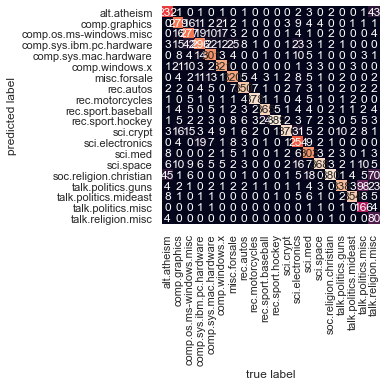

In [56]:
import json as j
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix



data= fetch_20newsgroups()
categories=data.target_names
train=fetch_20newsgroups(subset='train', categories=categories)
test=fetch_20newsgroups(subset='test', categories=categories)

model= make_pipeline(TfidfVectorizer(ngram_range = (1,2), stop_words = "english", sublinear_tf = True),
                     MultinomialNB())
model.fit(train.data, train.target)
labels=model.predict(test.data)

mat=confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True,fmt='d',
            cbar=False, xticklabels=train.target_names,
            yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');



In [111]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(test.target, labels))
print(metrics.classification_report(test.target, labels, target_names=test.target_names))

Accuracy: 0.8134625597450876
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.73      0.77       319
           comp.graphics       0.79      0.72      0.75       389
 comp.os.ms-windows.misc       0.78      0.70      0.74       394
comp.sys.ibm.pc.hardware       0.65      0.76      0.70       392
   comp.sys.mac.hardware       0.85      0.78      0.81       385
          comp.windows.x       0.87      0.81      0.84       395
            misc.forsale       0.83      0.82      0.83       390
               rec.autos       0.88      0.88      0.88       396
         rec.motorcycles       0.93      0.95      0.94       398
      rec.sport.baseball       0.89      0.92      0.90       397
        rec.sport.hockey       0.82      0.97      0.89       399
               sci.crypt       0.76      0.95      0.84       396
         sci.electronics       0.82      0.65      0.72       393
                 sci.med       0.89      0.77 

In [155]:
from tkinter import *
from tkinter import messagebox
import mysql.connector
from PIL import ImageTk,Image 

root = Tk()
root.title=('Machine Learning')


root.geometry("610x350")
bg_img=ImageTk.PhotoImage(Image.open("ML.png"), master=root)

canvas1 = Canvas( root, width = 400,
                 height = 400)
  
canvas1.pack(fill = "both", expand = True)
  
# Display image
canvas1.create_image( 0, 0, image = bg_img, 
                     anchor = "nw")
  
# Add Text
canvas1.create_text( 300, 45, text = "TEXT CLASSIFICATION", font="Castellar 26 bold")


#initializing gui values
txtCategory=StringVar()
str_Value=StringVar()

dl_img=ImageTk.PhotoImage(Image.open("dl.png"), master=root)

listCategory=['General','Email','Other'];
droplist=OptionMenu(root,txtCategory, *listCategory)
droplist.config(height=25,width=5, image=dl_img, bg='#999999' )
droplist.place(x=10, y=20)

canvas1.create_text( 200, 100, text = "ENTER TEXT HERE", font="Gabriola 18 bold")
strg_value = Text(root,height=5,width=45,bg='#999999')
strg_value.place(x=125, y=115)

rn_img=ImageTk.PhotoImage(Image.open("rn.png"), master=root)
rn_btn=Button(root, image=rn_img, bg='#00ff00',height=30,command=predict_category).place(x=125, y=205)
canvas1.create_text( 200, 255, text = "TEXT CATEGORY", font="Gabriola 18 bold")
rtn_value = Text(root,height=2,width=45,bg='#999999')
rtn_value.place(x=125, y=270)
ext_img=ImageTk.PhotoImage(Image.open("xt.png"), master=root)
ext_btn=Button(root, image=ext_img,bg='white',command=root.destroy).place(x=505, y=305)

root.mainloop()


In [154]:
def predict_category(train=train, model=model):
    st=strg_value.get("1.0",END)
    pred=model.predict([st])
    rtn_value.delete("1.0", END)
    return rtn_value.insert("end-1c",train.target_names[pred[0]])
